In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
covid_data = pd.read_csv('covid_data.csv')

## Sample Rows

In [30]:
covid_data.sample(10)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
1907,Barbados,2020-04-02,11,0,287371.0,14.952,16978.068,5.800
1176,Australia,2020-04-21,13,1,25499881.0,15.504,44648.710,3.840
19881,Swaziland,2020-03-20,0,0,1160164.0,3.163,7738.975,2.100
22520,Vietnam,2020-04-11,1,0,97338583.0,7.150,6171.884,2.600
4357,Chile,2020-05-12,1197,11,19116209.0,11.087,22767.037,2.110
3454,Burkina Faso,2020-05-20,10,1,20903278.0,2.409,1703.102,0.400
9528,Iceland,2020-02-21,0,0,341250.0,14.431,46482.958,2.910
4644,Colombia,2020-06-07,1392,60,50882884.0,7.646,13254.949,1.710
16382,Paraguay,2020-03-07,0,0,7132530.0,6.378,8827.010,1.300
18306,Serbia,2020-04-21,312,3,6804596.0,17.366,14048.881,5.609


## Unknown Column Values

In [31]:
covid_data.isna().sum()

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

## More Info

In [32]:
covid_data.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


## Correlation

In [33]:
covid_data.corr().style.background_gradient(cmap='coolwarm')

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
new_cases,1.000000,0.918490,0.659213,0.017650,0.011510,-0.012415
new_deaths,0.918490,1.000000,0.624136,0.038495,0.017184,-0.012647
population,0.659213,0.624136,1.000000,-0.022974,-0.052764,-0.029950
aged_65_older_percent,0.017650,0.038495,-0.022974,1.000000,0.461649,0.648919
gdp_per_capita,0.011510,0.017184,-0.052764,0.461649,1.000000,0.255495
hospital_beds_per_thousand,-0.012415,-0.012647,-0.029950,0.648919,0.255495,1.000000


## Number of cases

<AxesSubplot:xlabel='location', ylabel='new_cases'>

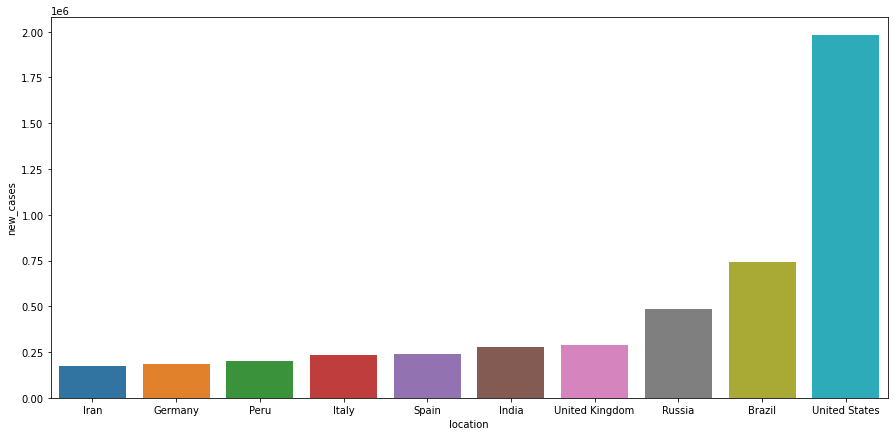

In [42]:
num_cases = covid_data[["location", "new_cases"]].groupby("location").sum().reset_index().sort_values("new_cases")
largest_10_cases = num_cases.tail(11).drop(208, axis=0)

plt.figure(figsize=(15,7))
sns.barplot(data=largest_10_cases, x="location", y="new_cases")

## Number of Deaths

<AxesSubplot:xlabel='location', ylabel='new_deaths'>

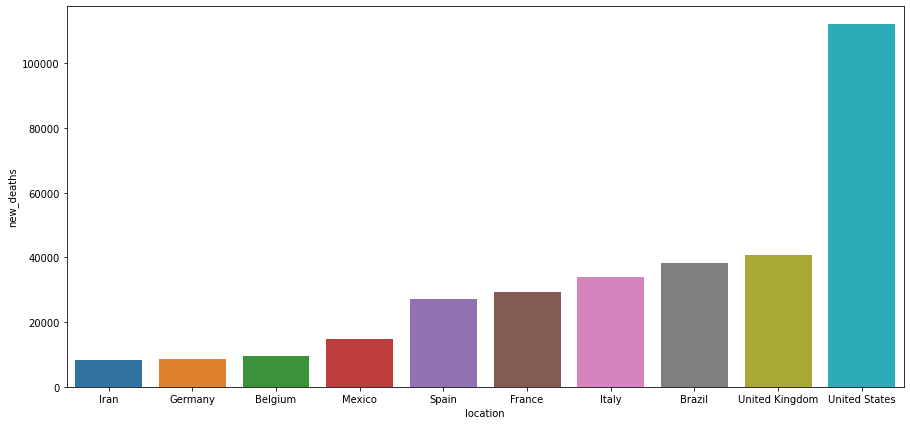

In [44]:
num_deaths = covid_data[["location", "new_deaths"]].groupby("location").sum().reset_index().sort_values("new_deaths")
largest_10_deaths = num_deaths.tail(11).drop(208, axis=0)

plt.figure(figsize=(15,7))
sns.barplot(data=largest_10_deaths, x="location", y="new_deaths")

## Hospital Beds per Thousand

<AxesSubplot:xlabel='location', ylabel='hospital_beds_per_thousand'>

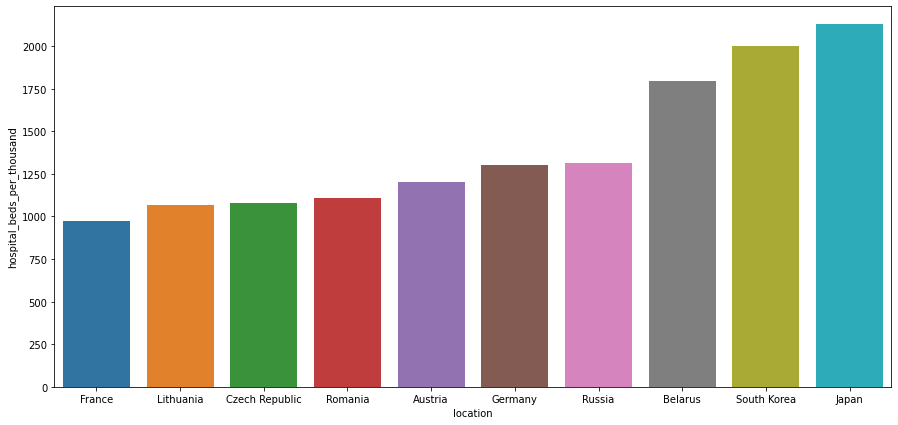

In [48]:
hospitals = covid_data.dropna()[["location", "hospital_beds_per_thousand"]].groupby("location").sum().reset_index().sort_values("hospital_beds_per_thousand")
largest_10 = hospitals.tail(10)

plt.figure(figsize=(15,7))
sns.barplot(data=largest_10, x="location", y="hospital_beds_per_thousand")

## Countries with largest percentage of population aged over 65

<AxesSubplot:xlabel='location', ylabel='aged_65_older_percent'>

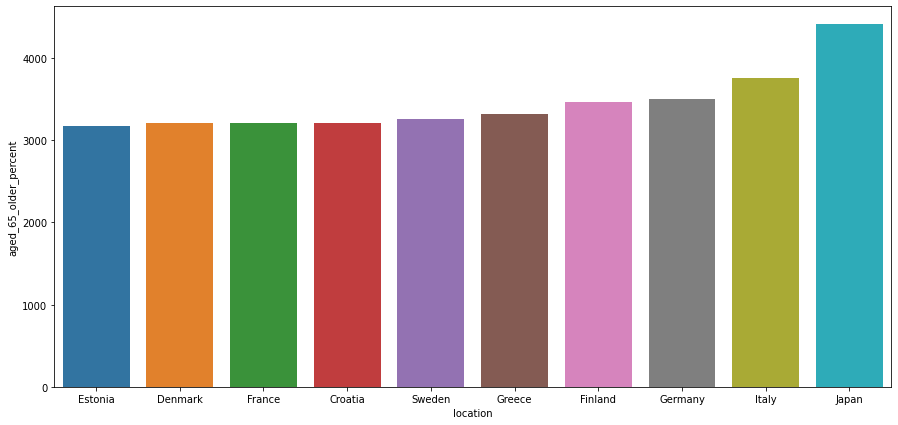

In [49]:
hospitals = covid_data.dropna()[["location", "aged_65_older_percent"]].groupby("location").sum().reset_index().sort_values("aged_65_older_percent")
largest_10 = hospitals.tail(10)

plt.figure(figsize=(15,7))
sns.barplot(data=largest_10, x="location", y="aged_65_older_percent")